In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
dat = pd.read_csv("processed.csv")

# Model Building

In [5]:
features = dat.drop(columns = ['pha'])

x = features.values
y = dat['pha'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.8, random_state = 8)

In [6]:
clf = DecisionTreeClassifier(random_state = 8)
clf.fit(xtrain, ytrain)

pred = clf.predict(xtest)

print(f'Training MSE error is: {round(mean_squared_error(clf.predict(xtrain), np.asarray(ytrain).reshape(-1, 1)), 4)}')
print(f'Testing MSE error is: {round(mean_squared_error(pred, np.asarray(ytest).reshape(-1, 1)), 4)}')

Training MSE error is: 0.0
Testing MSE error is: 0.0001


In [7]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     1.0000    0.9998    0.9999     52360
    Diabetes     0.9998    1.0000    0.9999     52410

    accuracy                         0.9999    104770
   macro avg     0.9999    0.9999    0.9999    104770
weighted avg     0.9999    0.9999    0.9999    104770



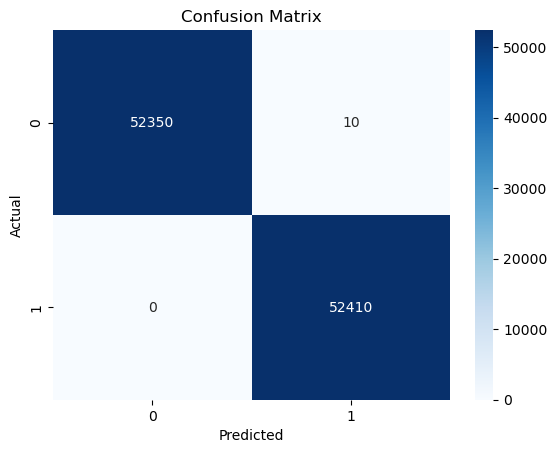

In [8]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
feature_importance = clf.feature_importances_
sortfeat = sorted(zip(features.columns, feature_importance), key=lambda x: x[1], reverse=True)

print("Feature Importance (Descending Order):")
for feature, importance in sortfeat:
    print(f"{feature}: {importance}")

Feature Importance (Descending Order):
moid: 0.9993893111082711
H: 0.0006106888917288729
Unnamed: 0: 0.0
neo: 0.0
diameter: 0.0
albedo: 0.0
diameter_sigma: 0.0
epoch: 0.0
epoch_mjd: 0.0
epoch_cal: 0.0
e: 0.0
a: 0.0
q: 0.0
i: 0.0
om: 0.0
w: 0.0
ma: 0.0
ad: 0.0
n: 0.0
tp: 0.0
tp_cal: 0.0
per: 0.0
per_y: 0.0
moid_ld: 0.0
sigma_e: 0.0
sigma_a: 0.0
sigma_q: 0.0
sigma_i: 0.0
sigma_om: 0.0
sigma_w: 0.0
sigma_ma: 0.0
sigma_ad: 0.0
sigma_n: 0.0
sigma_tp: 0.0
sigma_per: 0.0
class: 0.0
rms: 0.0
